In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("pubgall.csv")
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
df.shape

(4446966, 29)

In [5]:
df = df.sample(10000)
df.shape

(10000, 29)

In [6]:
df.to_csv("pubg.csv",index=False)

![pubgwallpaper](pubgwallpaper.png "pubgwallpaper")

So, where we droppin' boys and girls?

Battle Royale-style video games have taken the world by storm. 100 players are dropped onto an island empty-handed and must explore, scavenge, and eliminate other players until only one is left standing, all while the play zone continues to shrink.

PlayerUnknown's BattleGrounds (PUBG) has enjoyed massive popularity. With over 50 million copies sold, it's the fifth best selling game of all time, and has millions of active monthly players.

The team at PUBG has made official game data available for the public to explore and scavenge outside of "The Blue Circle." This competition is not an official or affiliated PUBG site - Kaggle collected data made possible through the PUBG Developer API.

You are given over 65,000 games' worth of anonymized player data, split into training and testing sets, and asked to predict final placement from final in-game stats and initial player ratings.

What's the best strategy to win in PUBG? Should you sit in one spot and hide your way into victory, or do you need to be the top shot? Let's let the data do the talking!

In [7]:
df = pd.read_csv("pubg.csv")
df.shape

(10000, 29)

In [8]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2f262dd9795e60,78437bcd91d40e,d5db3a49eb2955,0,0,0.0,0,0,0,92,...,0,0.0,0,0.0,0,0,0.0,0,1470,0.0000
1,a32847cf5bf34b,85b7ce5a12e10b,65223f05c7fdb4,0,0,163.2,1,1,0,42,...,0,0.0,0,0.0,0,0,132.7,2,1531,0.2222
2,1b1900a9990396,edf80d6523380a,1cadec4534f30a,0,3,278.7,2,1,8,16,...,3,0.0,0,0.0,0,0,3591.0,10,0,0.8571
3,f589dd03b60bf2,804ab5e5585558,c4a5676dc91604,0,0,191.9,1,0,0,31,...,0,0.0,0,0.0,0,0,332.7,3,0,0.3462
4,c23c4cc5b78b35,b3e2cd169ed920,cd595700a01bfa,0,0,100.0,1,0,0,87,...,0,0.0,0,0.0,0,0,252.7,3,1557,0.0690


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               10000 non-null  object 
 1   groupId          10000 non-null  object 
 2   matchId          10000 non-null  object 
 3   assists          10000 non-null  int64  
 4   boosts           10000 non-null  int64  
 5   damageDealt      10000 non-null  float64
 6   DBNOs            10000 non-null  int64  
 7   headshotKills    10000 non-null  int64  
 8   heals            10000 non-null  int64  
 9   killPlace        10000 non-null  int64  
 10  killPoints       10000 non-null  int64  
 11  kills            10000 non-null  int64  
 12  killStreaks      10000 non-null  int64  
 13  longestKill      10000 non-null  float64
 14  matchDuration    10000 non-null  int64  
 15  matchType        10000 non-null  object 
 16  maxPlace         10000 non-null  int64  
 17  numGroups    

In [10]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.0000,10000.000000
mean,0.234600,1.088500,129.211264,0.64400,0.221700,1.354000,47.663100,506.970200,0.913400,0.543800,...,0.160200,600.693584,0.004200,4.385917,0.024400,0.007700,1130.008410,3.63590,609.3440,0.469926
std,0.575149,1.703279,167.193945,1.09562,0.577046,2.629102,27.424146,627.297959,1.524117,0.701948,...,0.454045,1524.915601,0.074719,30.889620,0.171486,0.089674,1168.597983,2.42209,739.7924,0.304508
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,151.575000,2.00000,0.0000,0.200000
50%,0.000000,0.000000,83.805000,0.00000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,650.350000,3.00000,0.0000,0.458300
75%,0.000000,2.000000,185.325000,1.00000,0.000000,2.000000,71.000000,1169.000000,1.000000,1.000000,...,0.000000,0.000575,0.000000,0.000000,0.000000,0.000000,1923.250000,5.00000,1495.0000,0.735100
max,7.000000,18.000000,3469.000000,11.00000,14.000000,31.000000,100.000000,1926.000000,35.000000,4.000000,...,5.000000,28780.000000,3.000000,971.200000,3.000000,2.000000,10490.000000,41.00000,1863.0000,1.000000


__The Killers__

In [11]:
df['kills'].describe()

count    10000.000000
mean         0.913400
std          1.524117
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         35.000000
Name: kills, dtype: float64

In [12]:
df['kills'].mean()

0.9134

In [13]:
df['kills'].quantile(0.99)

7.0

In [14]:
df['kills'].max()

35

In [15]:
# Print all the columns of the dataframe
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [16]:
df['matchDuration'].mode()

0    1376
dtype: int64

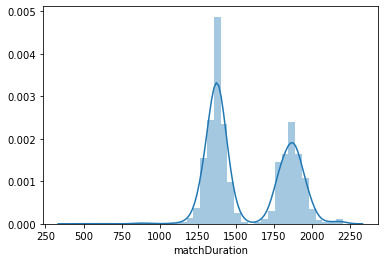

In [17]:
# distplot
# The distplot shows the distribution of a univariate set of observations.
# Univariate means One variable.

# Comment on distribution of the match's duration.
sns.distplot(df['matchDuration']);

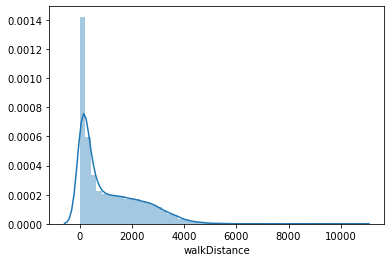

In [18]:
# Comment on distribution of the walk distance.

sns.distplot(df['walkDistance']);

In [19]:
# Plot distribution of the match's duration vs walk distance one below the other.

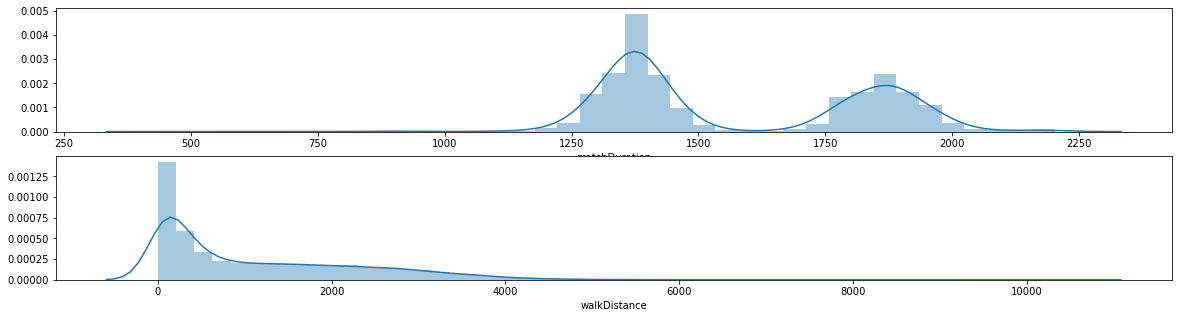

In [20]:
plt.figure(figsize=(20,5)) # create a plot figure
# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
sns.distplot(df['matchDuration']);
plt.subplot(2, 1, 2)
sns.distplot(df['walkDistance']);

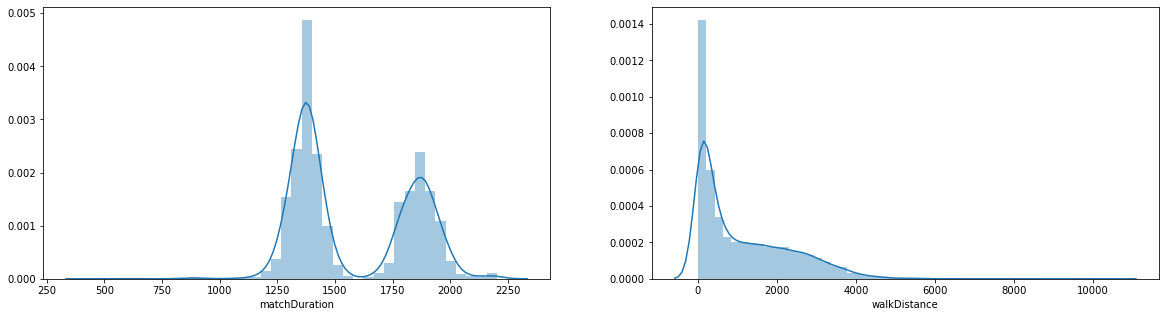

In [21]:
# Plot distribution of the match's duration vs walk distance side by side.

plt.figure(figsize=(20,5)) # create a plot figure
# create the first of two panels and set current axis
plt.subplot(1, 2, 1) # (rows, columns, panel number)
sns.distplot(df['matchDuration']);
plt.subplot(1, 2, 2)
sns.distplot(df['walkDistance']);

In [22]:
# Categorical cols
print(set(df.columns) - set(df.describe().columns))

{'groupId', 'Id', 'matchId', 'matchType'}


In [23]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [24]:
# How many unique values are there in 'matchType' and what are their counts?

df['matchType'].value_counts()

squad-fpp           3969
duo-fpp             2282
squad               1359
solo-fpp            1234
duo                  702
solo                 386
normal-squad-fpp      24
crashfpp              13
normal-duo-fpp        13
normal-solo-fpp        8
normal-squad           4
flaretpp               3
crashtpp               2
flarefpp               1
Name: matchType, dtype: int64

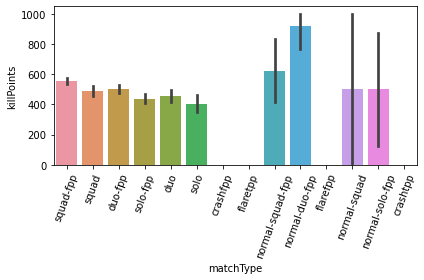

In [25]:
# barplot and countplot
# These very similar plots allow you to get aggregate data off a categorical feature in your data. barplot is a
# general plot that allows you to aggregate the categorical data based off some function, by default the mean:

sns.barplot(x='matchType',y='killPoints',data=df)
plt.xticks(rotation=70)
plt.tight_layout()
# Bar plots are basically a visualization of a group by action.

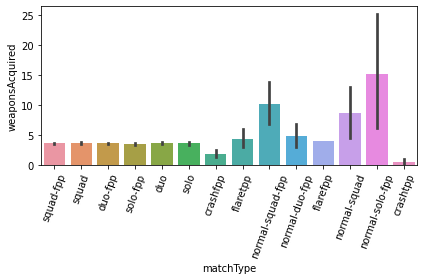

In [26]:
sns.barplot(x='matchType',y='weaponsAcquired',data=df)
plt.xticks(rotation=70)
plt.tight_layout()

In [27]:
# Categorical cols
print(set(df.columns) - set(df.describe().columns))

{'groupId', 'Id', 'matchId', 'matchType'}


In [28]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

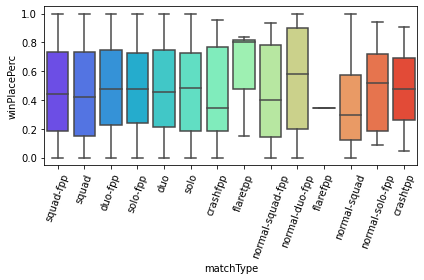

In [29]:
# boxplot and violinplot
# boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker
# plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or
# across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to
# show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a
# function of the inter-quartile range.

sns.boxplot(x="matchType", y="winPlacePerc", data=df,palette='rainbow')
plt.xticks(rotation=70)
plt.tight_layout()
# x is a categorical point
# y is a numeric point

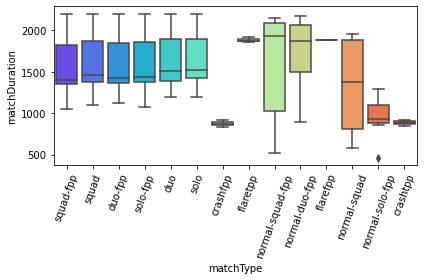

In [30]:
sns.boxplot(x="matchType", y="matchDuration", data=df,palette='rainbow')
plt.xticks(rotation=70)
plt.tight_layout()

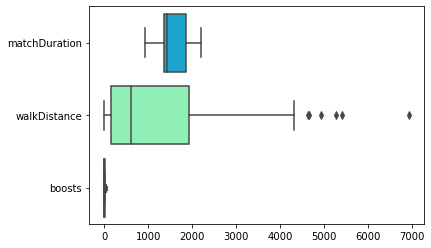

In [33]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=df[['matchDuration','walkDistance','boosts']].sample(1000),palette='rainbow',orient='h')

In [36]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.0000,10000.000000
mean,0.234600,1.088500,129.211264,0.64400,0.221700,1.354000,47.663100,506.970200,0.913400,0.543800,...,0.160200,600.693584,0.004200,4.385917,0.024400,0.007700,1130.008410,3.63590,609.3440,0.469926
std,0.575149,1.703279,167.193945,1.09562,0.577046,2.629102,27.424146,627.297959,1.524117,0.701948,...,0.454045,1524.915601,0.074719,30.889620,0.171486,0.089674,1168.597983,2.42209,739.7924,0.304508
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,151.575000,2.00000,0.0000,0.200000
50%,0.000000,0.000000,83.805000,0.00000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,650.350000,3.00000,0.0000,0.458300
75%,0.000000,2.000000,185.325000,1.00000,0.000000,2.000000,71.000000,1169.000000,1.000000,1.000000,...,0.000000,0.000575,0.000000,0.000000,0.000000,0.000000,1923.250000,5.00000,1495.0000,0.735100
max,7.000000,18.000000,3469.000000,11.00000,14.000000,31.000000,100.000000,1926.000000,35.000000,4.000000,...,5.000000,28780.000000,3.000000,971.200000,3.000000,2.000000,10490.000000,41.00000,1863.0000,1.000000


In [37]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [38]:
# Add a new column called KILL which contains the sum of following columns viz. headshotKills, teamKills, roadKills
df['KILL'] = df['headshotKills'] + df['teamKills'] + df['roadKills']
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,KILL
0,2f262dd9795e60,78437bcd91d40e,d5db3a49eb2955,0,0,0.0,0,0,0,92,...,0.0,0,0.0,0,0,0.0,0,1470,0.0000,0
1,a32847cf5bf34b,85b7ce5a12e10b,65223f05c7fdb4,0,0,163.2,1,1,0,42,...,0.0,0,0.0,0,0,132.7,2,1531,0.2222,1
2,1b1900a9990396,edf80d6523380a,1cadec4534f30a,0,3,278.7,2,1,8,16,...,0.0,0,0.0,0,0,3591.0,10,0,0.8571,1
3,f589dd03b60bf2,804ab5e5585558,c4a5676dc91604,0,0,191.9,1,0,0,31,...,0.0,0,0.0,0,0,332.7,3,0,0.3462,0
4,c23c4cc5b78b35,b3e2cd169ed920,cd595700a01bfa,0,0,100.0,1,0,0,87,...,0.0,0,0.0,0,0,252.7,3,1557,0.0690,0


In [39]:
# Round off column winPlacePerc to 2 decimals
df['winPlacePerc'] = round(df['winPlacePerc'],2)
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,KILL
0,2f262dd9795e60,78437bcd91d40e,d5db3a49eb2955,0,0,0.0,0,0,0,92,...,0.0,0,0.0,0,0,0.0,0,1470,0.00,0
1,a32847cf5bf34b,85b7ce5a12e10b,65223f05c7fdb4,0,0,163.2,1,1,0,42,...,0.0,0,0.0,0,0,132.7,2,1531,0.22,1
2,1b1900a9990396,edf80d6523380a,1cadec4534f30a,0,3,278.7,2,1,8,16,...,0.0,0,0.0,0,0,3591.0,10,0,0.86,1
3,f589dd03b60bf2,804ab5e5585558,c4a5676dc91604,0,0,191.9,1,0,0,31,...,0.0,0,0.0,0,0,332.7,3,0,0.35,0
4,c23c4cc5b78b35,b3e2cd169ed920,cd595700a01bfa,0,0,100.0,1,0,0,87,...,0.0,0,0.0,0,0,252.7,3,1557,0.07,0


In [40]:
# Take sample of size 50 from the column damageDealt for 100 times and calculate its mean.
# Plot it on a histogram and comment on its distribution.
l = []
for i in range(100):
    l.append(df['damageDealt'].sample(50).mean())
print(l)

[142.49238, 112.17066000000001, 210.02184000000005, 121.73889999999997, 131.6392, 100.87700000000001, 132.668, 125.42814600000003, 122.38860000000003, 101.90799999999999, 142.5592, 164.53760000000003, 104.70305999999997, 161.5647, 142.28340000000003, 162.78239999999997, 135.74254000000002, 132.92808000000002, 138.2002, 138.45087999999998, 144.57280000000003, 107.15899999999999, 133.79100000000003, 130.47080000000003, 123.41879999999999, 119.38359999999999, 114.83256000000002, 134.84024, 119.70000000000003, 142.9576, 108.8634, 118.38859999999998, 161.6968, 165.1352, 129.07059999999998, 128.20232, 160.16979999999998, 129.31683999999998, 149.6044, 168.04814000000002, 134.18396, 139.94980000000004, 117.44272000000001, 123.13218, 94.4234, 109.29187999999998, 109.28898, 109.5038, 120.25929999999995, 132.2076, 110.17487999999999, 133.08124, 144.73755999999995, 167.38219999999998, 143.51880000000003, 118.7466, 117.12653999999995, 96.97320000000002, 127.3708, 85.73819999999999, 75.5967000000000

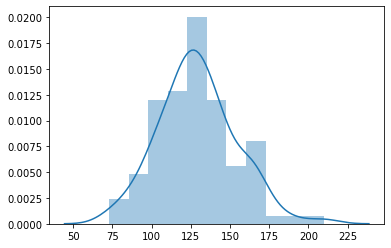

In [41]:
sns.distplot(l);

# Happy Learning